In [2]:
import pandas as pd
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [8]:
df.isnull().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

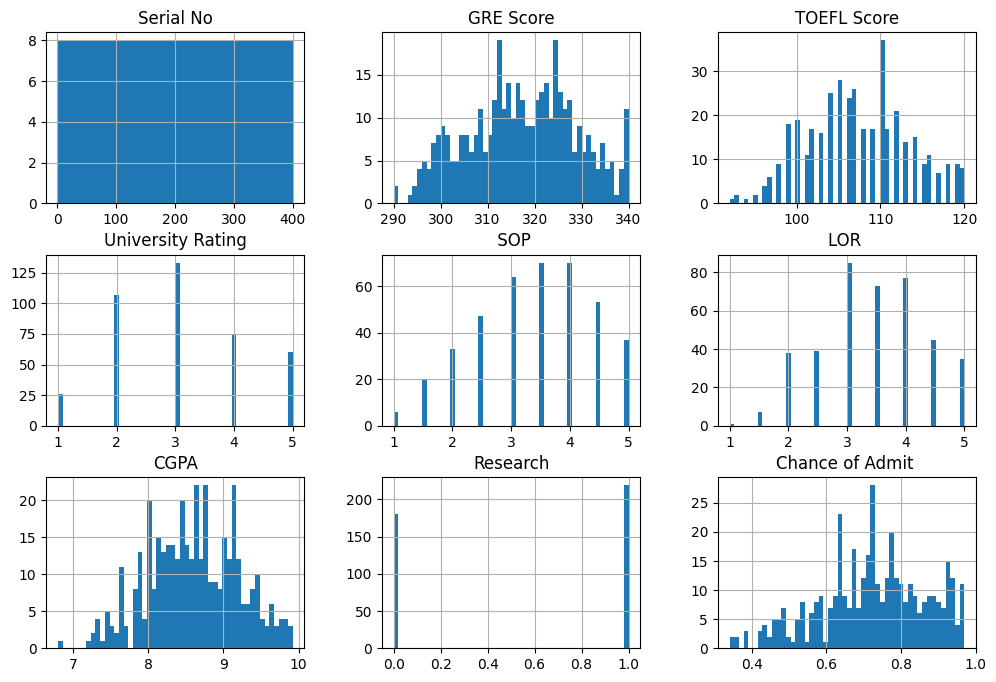

In [47]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(12,8))
plt.show()

In [13]:
x=df.drop(['Serial No','Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [14]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42,shuffle=True)
print(x_train.shape,x_test.shape)


(340, 7) (60, 7)


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtModel=DecisionTreeRegressor()
dtModel.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
train_preds=dtModel.predict(x_train)
train_preds[300]

np.float64(0.76)

In [56]:
y_train.iloc[300]

np.float64(0.76)

In [52]:
dtModel.predict([x_train.iloc[150]])

c:\Users\Mohamed Saber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.76])

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse_tr=mean_squared_error(train_preds,y_train)
mae_tr=mean_absolute_error(train_preds,y_train)
r2_tr=r2_score(train_preds,y_train)
print('mse = ',mse_tr)
print('mae = ',mae_tr)
print('r2_score = ',r2_tr)

mse =  3.262751905785435e-34
mae =  2.938825653419532e-18
r2_score =  1.0


In [42]:
test_preds=dtModel.predict(x_test)
test_preds[0]

np.float64(0.54)

In [43]:
mse_ts=mean_squared_error(test_preds,y_test)
mae_ts=mean_absolute_error(test_preds,y_test)
r2_ts=r2_score(y_test,y_test)
print('mse = ',mse_ts)
print('mae = ',mae_ts)
print('r2_score = ',r2_ts)

mse =  0.009318333333333336
mae =  0.06616666666666667
r2_score =  1.0


In [57]:
import joblib 
saved=joblib.dump(dtModel,'saved_model.pkl')
saved

['saved_model.pkl']

In [58]:
load=joblib.load('saved_model.pkl')
load

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [59]:
x_train.iloc[0]

GRE Score            301.00
TOEFL Score          106.00
University Rating      4.00
 SOP                   2.50
LOR                    3.00
CGPA                   8.47
Research               0.00
Name: 124, dtype: float64

In [61]:
load.predict([[301,106,4,2.5,3,8.47,0]])

c:\Users\Mohamed Saber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.57])

In [62]:
y_train.iloc[0]

np.float64(0.57)

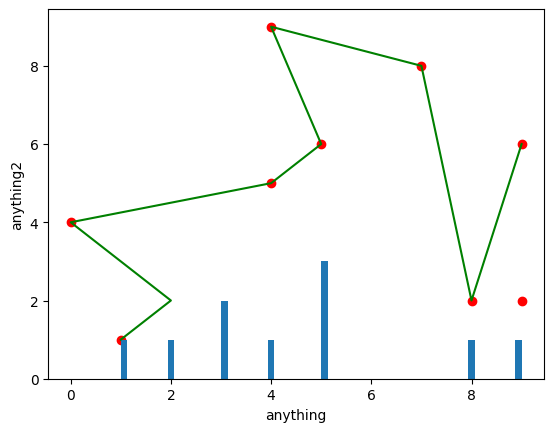

In [85]:
plt.plot([1,2,0,4,5,4,7,8,9],[1,2,4,5,6,9,8,2,6],c='g')
plt.scatter([1,9,0,4,5,4,7,8,9],[1,2,4,5,6,9,8,2,6],c='r')
plt.hist([5,1,2,3,5,9,4,3,5,8],bins=60)
plt.xlabel('anything')
plt.ylabel('anything2')
plt.show()